In [ ]:
!pip install ultralytics

In [6]:
from ultralytics import YOLO

model = YOLO("yolo11n-pose.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [14]:
import cv2
import os
TEST_IMG = "/content/drive/MyDrive/[Projects]/AI Hub/Pose Detection 기반 실시간 낙상 감지 시스템 개발/Data/data_resized/낙상사고 위험동작 영상-센서 쌍 데이터_병원,후면낙상/3.개방데이터/1.데이터/Training/01.원천데이터/TS/이미지/N/N/00280_H_D_N_C1/00280_H_D_N_C1_I001.JPG"   # ← 여기에 너의 이미지 경로 넣어


img = cv2.imread(TEST_IMG)

print("파일 존재?", os.path.exists(TEST_IMG))
print("파일 크기:", os.path.getsize(TEST_IMG), "bytes")

print("cv2.imread 결과:", img)

파일 존재? True
파일 크기: 174011 bytes
cv2.imread 결과: [[[190 181 161]
  [190 181 161]
  [190 181 161]
  ...
  [106 107 103]
  [106 107 103]
  [106 107 103]]

 [[190 181 161]
  [190 181 161]
  [190 181 161]
  ...
  [106 107 103]
  [106 107 105]
  [106 107 103]]

 [[190 181 161]
  [190 181 161]
  [190 181 161]
  ...
  [106 107 105]
  [106 106 106]
  [106 107 105]]

 ...

 [[ 50 137  99]
  [ 50 137  99]
  [ 50 138  98]
  ...
  [ 92 103 107]
  [ 92 103 107]
  [ 92 103 107]]

 [[ 49 138  99]
  [ 49 138  99]
  [ 49 138  98]
  ...
  [ 92 103 107]
  [ 92 103 107]
  [ 92 103 107]]

 [[ 49 138  99]
  [ 49 138  99]
  [ 49 138  98]
  ...
  [ 92 103 107]
  [ 92 103 107]
  [ 92 103 107]]]


In [12]:
from ultralytics import YOLO
import json, os
import cv2

# 테스트할 이미지 1장
TEST_IMG = "/content/drive/MyDrive/[Projects]/AI Hub/Pose Detection 기반 실시간 낙상 감지 시스템 개발/Data/data_resized/낙상사고 위험동작 영상-센서 쌍 데이터_병원,후면낙상/3.개방데이터/1.데이터/Training/01.원천데이터/TS/이미지/N/N/00280_H_D_N_C1/00280_H_D_N_C1_I001.JPG"   # ← 여기에 너의 이미지 경로 넣어

# 저장할 JSON
OUT_JSON = "/content/test_kp.json"

model = YOLO("yolov8m-pose.pt")

results = model(TEST_IMG, verbose=True)[0]

keypoints_out = []

if results.keypoints is not None:
    kps = results.keypoints.data.cpu().numpy().tolist()
    keypoints_out.append(kps)

with open(OUT_JSON, "w") as f:
    json.dump({"keypoints": keypoints_out}, f, indent=2)

print("저장 완료:", OUT_JSON)
print("Keypoints 개수:", len(keypoints_out))



image 1/1 /content/drive/MyDrive/[Projects]/AI Hub/Pose Detection 기반 실시간 낙상 감지 시스템 개발/Data/data_resized/낙상사고 위험동작 영상-센서 쌍 데이터_병원,후면낙상/3.개방데이터/1.데이터/Training/01.원천데이터/TS/이미지/N/N/00280_H_D_N_C1/00280_H_D_N_C1_I001.JPG: 384x640 1 person, 27.7ms
Speed: 2.0ms preprocess, 27.7ms inference, 2.1ms postprocess per image at shape (1, 3, 384, 640)
저장 완료: /content/test_kp.json
Keypoints 개수: 1


In [15]:
import cv2
from ultralytics import YOLO

    # ← 테스트할 이미지 경로
OUT_IMG = "/content/test_vis.jpg" # ← 저장할 시각화 이미지

model = YOLO("yolov8m-pose.pt")

results = model(TEST_IMG, verbose=True)
result = results[0]

img = cv2.imread(TEST_IMG)

# YOLO에서 제공하는 시각화 이미지 자동 생성
annotated = result.plot()  # keypoint + skeleton 합성 이미지

cv2.imwrite(OUT_IMG, annotated)
print("시각화 저장 완료:", OUT_IMG)


image 1/1 /content/drive/MyDrive/[Projects]/AI Hub/Pose Detection 기반 실시간 낙상 감지 시스템 개발/Data/data_resized/낙상사고 위험동작 영상-센서 쌍 데이터_병원,후면낙상/3.개방데이터/1.데이터/Training/01.원천데이터/TS/이미지/N/N/00280_H_D_N_C1/00280_H_D_N_C1_I001.JPG: 384x640 1 person, 27.0ms
Speed: 1.6ms preprocess, 27.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)
시각화 저장 완료: /content/test_vis.jpg


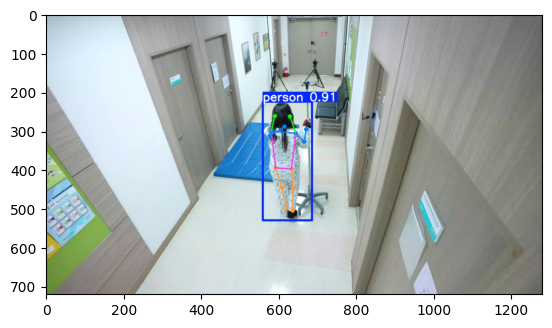

In [16]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(OUT_IMG)
plt.imshow(img)
plt.show()

In [17]:
import os
import json
from tqdm import tqdm
from ultralytics import YOLO

# YOLO Pose 모델 불러오기
model = YOLO("yolov8m-pose.pt")

# 입력 이미지 루트
ROOT = "/content/drive/MyDrive/[Projects]/AI Hub/Pose Detection 기반 실시간 낙상 감지 시스템 개발/Data/data_resized/낙상사고 위험동작 영상-센서 쌍 데이터_병원,후면낙상/3.개방데이터/1.데이터/Training/01.원천데이터/TS/이미지"

# 출력(JSON) 루트
OUT = ROOT.replace("이미지", "kp")
os.makedirs(OUT, exist_ok=True)


def ensure_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)


def process_all():
    all_images = []

    # 이미지 리스트 수집
    for root, dirs, files in os.walk(ROOT):
        for f in files:
            if f.lower().endswith((".jpg", ".jpeg", ".png")):
                all_images.append(os.path.join(root, f))

    print(f"총 이미지 수: {len(all_images)}")

    # 전체 이미지 프로세싱
    for img_path in tqdm(all_images, desc="Extracting keypoints", unit="img"):

        # 상대 경로 유지
        rel = os.path.relpath(img_path, ROOT)

        # 확장자만 교체 (절대 replace 하지 마셈)
        rel_no_ext, _ = os.path.splitext(rel)
        out_json = os.path.join(OUT, rel_no_ext + "_kp.json")

        # 폴더 생성
        ensure_dir(os.path.dirname(out_json))

        # YOLO Pose 예측
        result = model(img_path, verbose=False)[0]

        keypoints_out = []

        if result.keypoints is not None:
            kps = result.keypoints.data.cpu().numpy().tolist()
            keypoints_out.append(kps)

        # JSON 저장
        with open(out_json, "w") as f:
            json.dump({"keypoints": keypoints_out}, f, indent=2)

    print("🔥 전체 이미지 keypoints JSON 저장 완료!")


process_all()

총 이미지 수: 41280


Extracting keypoints: 100%|██████████| 41280/41280 [9:49:50<00:00,  1.17img/s]

🔥 전체 이미지 keypoints JSON 저장 완료!


In [18]:
import os
import json
from tqdm import tqdm
from ultralytics import YOLO

# YOLO Pose 모델 불러오기
model = YOLO("yolov8m-pose.pt")

# 입력 이미지 루트
ROOT = "/content/drive/MyDrive/[Projects]/AI Hub/Pose Detection 기반 실시간 낙상 감지 시스템 개발/Data/data_resized/낙상사고 위험동작 영상-센서 쌍 데이터_병원,후면낙상/3.개방데이터/1.데이터/Validation/01.원천데이터/VS/이미지"

# 출력(JSON) 루트
OUT = ROOT.replace("이미지", "kp")
os.makedirs(OUT, exist_ok=True)


def ensure_dir(path):
    if not os.path.exists(path):
        os.makedirs(path)


def process_all():
    all_images = []

    # 이미지 리스트 수집
    for root, dirs, files in os.walk(ROOT):
        for f in files:
            if f.lower().endswith((".jpg", ".jpeg", ".png")):
                all_images.append(os.path.join(root, f))

    print(f"총 이미지 수: {len(all_images)}")

    # 전체 이미지 프로세싱
    for img_path in tqdm(all_images, desc="Extracting keypoints", unit="img"):

        # 상대 경로 유지
        rel = os.path.relpath(img_path, ROOT)

        # 확장자만 교체 (절대 replace 하지 마셈)
        rel_no_ext, _ = os.path.splitext(rel)
        out_json = os.path.join(OUT, rel_no_ext + "_kp.json")

        # 폴더 생성
        ensure_dir(os.path.dirname(out_json))

        # YOLO Pose 예측
        result = model(img_path, verbose=False)[0]

        keypoints_out = []

        if result.keypoints is not None:
            kps = result.keypoints.data.cpu().numpy().tolist()
            keypoints_out.append(kps)

        # JSON 저장
        with open(out_json, "w") as f:
            json.dump({"keypoints": keypoints_out}, f, indent=2)

    print("🔥 전체 이미지 keypoints JSON 저장 완료!")


process_all()

총 이미지 수: 5920


Extracting keypoints: 100%|██████████| 5920/5920 [1:39:33<00:00,  1.01s/img]

🔥 전체 이미지 keypoints JSON 저장 완료!
